In [1]:
#### IMPORTING LIBRARIES
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.decomposition import PCA
from numpy.linalg import inv, eig, det
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
#### LOADING THE WINE DATASET
wine = load_wine()

In [3]:
#### SPARATING FEATURE AND TARGET COLUMN
X = wine.data
y = wine.target

print(X.shape)
print(y.shape)

(178, 13)
(178,)


#### 1. PERFORMING EIGAN VALUED DECOMPOSITION FOR COMPARING IT WITH PCA RESULT CARRIED AFTER

In [4]:
X_tr = np.transpose(X)
sigma_matrix = np.cov(X_tr)
print(sigma_matrix.shape)

(13, 13)


In [5]:
result = eig(sigma_matrix)
print("Eigan Values Matrix:", result[0])
print("Eigan Vector Matrix:", result[1])

Eigan Values Matrix: [9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 8.20370314e-03 2.10723661e-02 3.75759789e-02
 7.17026032e-02]
Eigan Vector Matrix: [[-1.65926472e-03 -1.20340617e-03  1.68738094e-02  1.41446778e-01
  -2.03369773e-02  1.94120104e-01 -9.23280337e-01  2.84820658e-01
   8.66006124e-02  8.02924535e-03  1.56514071e-02 -1.49715080e-02
  -2.24499994e-03]
 [ 6.81015556e-04 -2.15498184e-03  1.22003373e-01  1.60389543e-01
   6.12883454e-01  7.42472963e-01  1.50109941e-01 -6.46744678e-02
   1.56621385e-02 -1.10903923e-02 -6.72955455e-02 -2.31876506e-02
  -1.85093501e-02]
 [-1.94905742e-04 -4.59369254e-03  5.19874304e-02 -9.77280992e-03
  -2.01755752e-02  4.17529118e-02 -4.50095493e-02 -1.49339532e-01
   7.36498524e-02 -1.73685673e-01  1.32063034e-01  9.54010643e-01
  -8.67996529e-02]
 [ 4.67130058e-03 -2.64503930e-02  9.38593003e-01 -3.30965260e-01
  -6.43523403e-02 -2.40653026e-02 -3.1526

In [6]:
#### GENERALIZED VARIANCE TO MEASURE THE AMOUNT OF INFORMATION IN OLD SYSTEM X
gen_variance_X = det(sigma_matrix)
print("Generalised variance of old system X:", gen_variance_X)

#### TRACE OF VARIANCES TO MEASURE THE AMOUNT OF INFORMATION IS IN X
trace_variance = sum(np.diag(sigma_matrix))
print("Trace of the variances of the old system X:", trace_variance)

Generalised variance of old system X: 1.8374203928050534
Trace of the variances of the old system X: 99391.50499157321


In [7]:
#### FOR GETTING THE NEW TRANSFORMED SYSTEM 'M', WE NEED TO MULTIPLY 'X' WITH EIGAN VECTOR MATRIX
M = np.dot(X, result[1])
M.shape

(178, 13)

In [8]:
M_tr = np.transpose(M)
sigma_M = np.cov(M_tr)
sigma_M.shape

(13, 13)

In [9]:
#### GENERALIZED VARIANCE TO MEASURE THE AMOUNT OF INFORMATION TRANSFERRED TO NEW SYSTEM M AFTER THE DECOMPOSITION
gen_variance_M = det(sigma_M)
print("Generalised variance of the new system M:", gen_variance_M)

#### TRACE OF VARIANCES TO MEASURE THE AMOUNT OF INFORMATION IS IN M
trace_variance = sum(np.diag(sigma_M))
print("Trace of the variances of the new system M:", trace_variance)

Generalised variance of the new system M: 1.837420392805072
Trace of the variances of the new system M: 99391.50499157334


##### THEREFORE, WE CAN STATE THAT THE SAME AMOUNT OF INFORMATION IS TRANSFORMED IN THE NEW SYSTEM M AFTER THE
##### EIGAN VALUED DECOMPOSITION PERFORMED

#### 2. PERFORMING PCA FOR COMPARISON WITH THE PREVIOUS COMPUTATION

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
print(pca)
type(pca)
pca.fit(X_scaled)
print("Eigan Vector Matrix of the old system X:", pca.components_)

PCA()
Eigan Vector Matrix of the old system X: [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [ 0.21353865  0.53681385  0.15447466 -0.10082451  0.03814394 -0.0841223
  -0.01892002 -0.25859401 -0.53379539 -0.41864414  0.10598274  0.

In [11]:
#### TRANSFORMING IT INTO NEW SYSTEM M
M = pca.transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Ratios of the Cummulative Summation of the Eigan Values of these 13 features:", np.cumsum(explained_variance))

Ratios of the Cummulative Summation of the Eigan Values of these 13 features: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


##### CONSIDERING THE RETENTION THRESHOLD AS 0.75 FOR INCLUSION OF THE IMPORTANT FEATURES IN THE SYSTEM, WE DECIDE 
##### TO INCLUDE ONLY X1, X2, X3 AND X4 IN THE SYSTEM.


In [12]:
#### REDUCED SPACE
pca = PCA(n_components = 4)
pca.fit(X_scaled)
M_reduced = pca.transform(X_scaled)
M_reduced.shape

(178, 4)

##### THEREFORE, WE CAN STATE THAT, PCA PERFORMS EXACTLY THE SAME COMPUTATIONS AUTOMATICALLY, THOSE WERE 
##### PERFORMED BY THE EIGAN VALUED DECOMPOSITION METHOD BEFORE PERFORMING PCA.

#### 3. FITTING AND PREDICTION FROM THE DECISION TREE MODEL

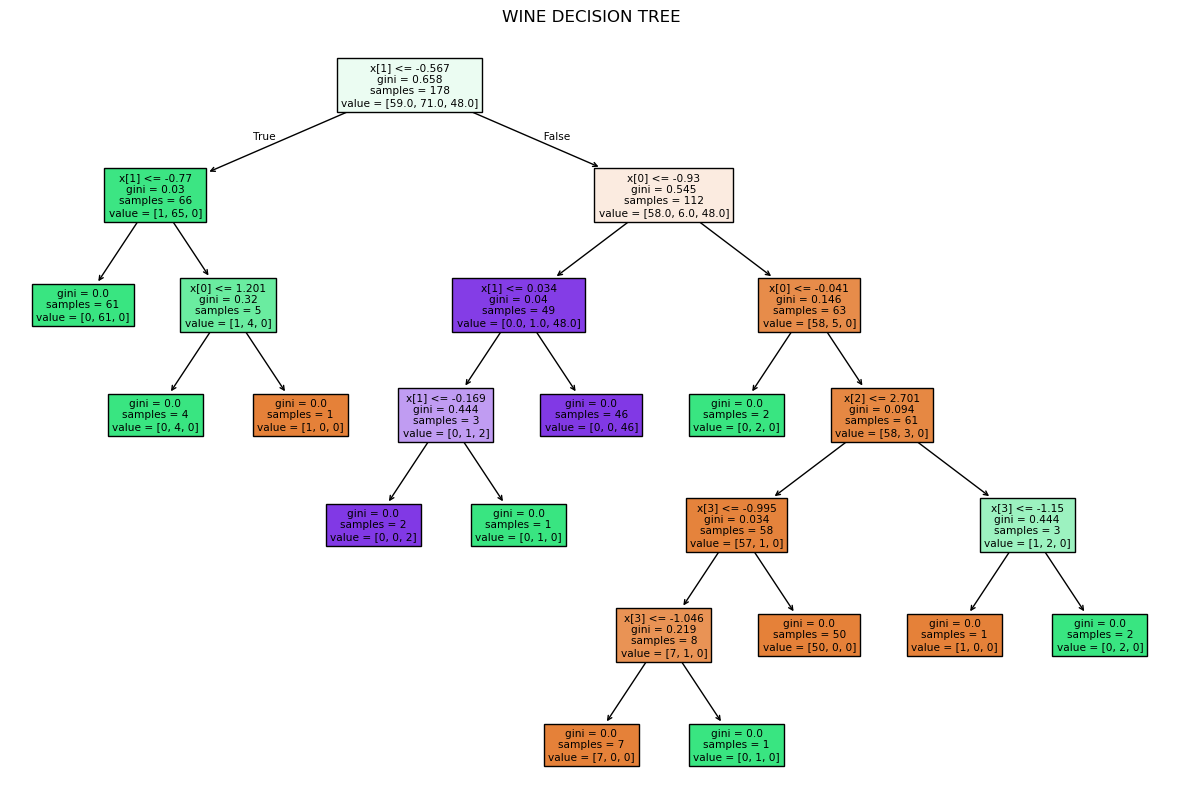

In [13]:
clf = DecisionTreeClassifier()
model = clf.fit(M_reduced, y)

fig = plt.figure(figsize = (15,10))
dec_tree = plot_tree(clf, filled = True)
plt.title('WINE DECISION TREE')
plt.show()


In [14]:
#### INLINE PREDICTION
y_pred = model.predict(M_reduced)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [15]:
accuracy = accuracy_score(y, y_pred)
print(accuracy)

1.0


In [16]:
#### OUTLINE PREDICTION
test_object = model.predict(np.array([[5,3,2,1]]))
print("The test object belongs to the wine of class:", test_object)

The test object belongs to the wine of class: [0]
